In [1]:
import numpy as np
import matplotlib.pylab as plt
import os
import Methods as ms
from Methods import CGT

## Construct CGT Objects (at different T)

In [2]:
#Temperatures tested
temps = [0.1, 0.3]

In [3]:
#T = 0.1
f = [0, 0.25, 0.5, 0.75, 1, 2, 5]
t = 0.1
Rgfolder = '../Data/Block10/Radius of gyration/ForcesT01'
Reefolder = '../Data/Block10/End-to-end distance/ForcesT01'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT01 = CGT(f, t, Rgpaths, Reepaths)

In [4]:
#T = 0.3
f = [0, 0.25, 0.5, 0.75, 1, 2, 5]
t = 0.3
Rgfolder = '../Data/Block10/Radius of gyration/ForcesT03'
Reefolder = '../Data/Block10/End-to-end distance/ForcesT03'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT03 = CGT(f, t, Rgpaths, Reepaths)

In [5]:
# #T = 0.5
# f = [0, 0.1, 0.5, 0.6, 0.75, 0.9, 1, 1.1, 1.3, 1.5, 2, 5]
# t = 0.5
# Rgfolder = '../Data/Block5/Radius of gyration/ForcesT05'
# Reefolder = '../Data/Block5/End-to-end distance/ForcesT05'
# Rgpaths = []
# Reepaths = []
# for path in os.listdir(Rgfolder):
#     Rgpaths.append(Rgfolder + '/' + path)
#     Rgpaths.sort()

# for path in os.listdir(Reefolder):
#     Reepaths.append(Reefolder + '/' + path)
#     Reepaths.sort()

# CGT05 = CGT(f, t, Rgpaths, Reepaths)

In [6]:
# #T = 0.75
# f = [0, 0.5, 0.75, 1, 2, 5]
# t = 0.75
# Rgfolder = '../Data/Block5/Radius of gyration/ForcesT075'
# Reefolder = '../Data/Block5/End-to-end distance/ForcesT075'
# Rgpaths = []
# Reepaths = []
# for path in os.listdir(Rgfolder):
#     Rgpaths.append(Rgfolder + '/' + path)
#     Rgpaths.sort()

# for path in os.listdir(Reefolder):
#     Reepaths.append(Reefolder + '/' + path)
#     Reepaths.sort()

# CGT075 = CGT(f, t, Rgpaths, Reepaths)

In [7]:
# #T = 1
# f = [0, 0.1, 0.5, 1, 2, 5]
# t = 1
# Rgfolder = '../Data/Block5/Radius of gyration/ForcesT1'
# Reefolder = '../Data/Block5/End-to-end distance/ForcesT1'
# Rgpaths = []
# Reepaths = []
# for path in os.listdir(Rgfolder):
#     Rgpaths.append(Rgfolder + '/' + path)
#     Rgpaths.sort()

# for path in os.listdir(Reefolder):
#     Reepaths.append(Reefolder + '/' + path)
#     Reepaths.sort()

# CGT1 = CGT(f, t, Rgpaths, Reepaths)

In [8]:
# #T = 2
# f = [0, 0.1, 0.5, 1, 2, 5]
# t = 2
# Rgfolder = '../Data/Block5/Radius of gyration/ForcesT2'
# Reefolder = '../Data/Block5/End-to-end distance/ForcesT2'
# Rgpaths = []
# Reepaths = []
# for path in os.listdir(Rgfolder):
#     Rgpaths.append(Rgfolder + '/' + path)
#     Rgpaths.sort()

# for path in os.listdir(Reefolder):
#     Reepaths.append(Reefolder + '/' + path)
#     Reepaths.sort()

# CGT2 = CGT(f, t, Rgpaths, Reepaths)

In [9]:
# #T = 5
# f = [0, 0.1, 0.5, 1, 2, 5]
# t = 5
# Rgfolder = '../Data/Block5/Radius of gyration/ForcesT5'
# Reefolder = '../Data/Block5/End-to-end distance/ForcesT5'
# Rgpaths = []
# Reepaths = []
# for path in os.listdir(Rgfolder):
#     Rgpaths.append(Rgfolder + '/' + path)
#     Rgpaths.sort()

# for path in os.listdir(Reefolder):
#     Reepaths.append(Reefolder + '/' + path)
#     Reepaths.sort()

# CGT5 = CGT(f, t, Rgpaths, Reepaths)

In [10]:
lsCGTBl10 = [CGT01, CGT03]
%store lsCGTBl10
forces = ms.lsForces(lsCGTBl10)
print(forces)

Stored 'lsCGTBl10' (list)
[0.0, 0.25, 0.5, 0.75, 1.0, 2.0, 5.0]


## Check Equilibrium

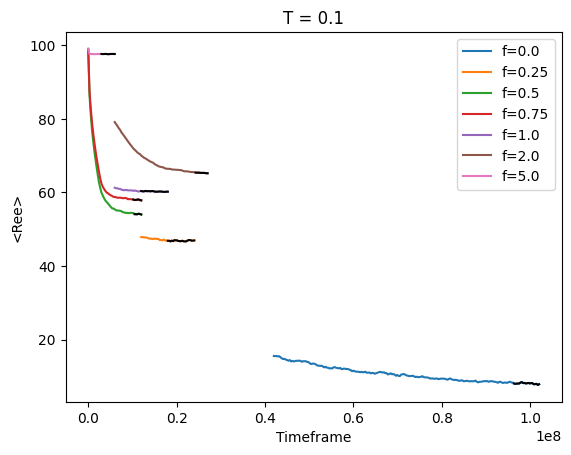

In [11]:
CGT01.Plot('Ree')

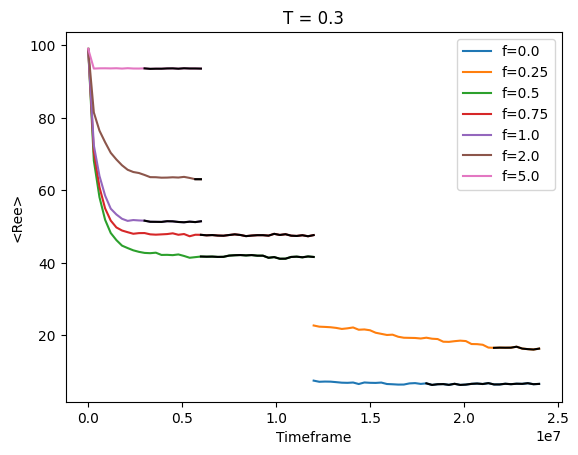

In [12]:
CGT03.Plot('Ree')

## Temperature Extension

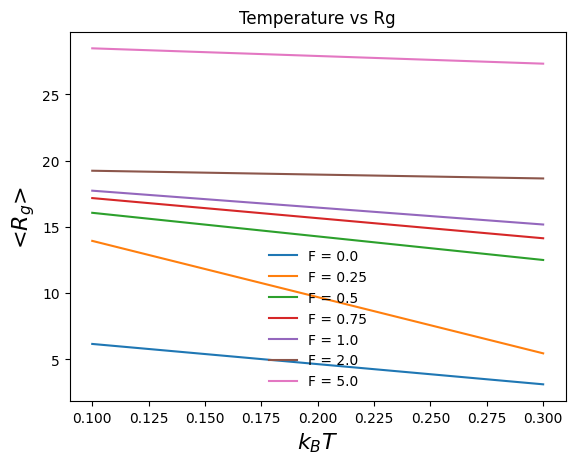

In [13]:
for f in forces:
    data = []
    tempsCopy = temps[:]
    for cgt in lsCGTBl10:
        try:
            i = np.where(cgt.f == f)[0][0]
        except IndexError:
            
            tempsCopy.remove(cgt.t)
            continue
        data.append(cgt.aveRg[i])
    plt.plot(tempsCopy, data, label = 'F = ' + str(f))

plt.xlabel('$k_{B} T$', fontsize=16)
plt.ylabel('<$R_{g}$>', fontsize=16)
plt.legend(frameon=False)
plt.title("Temperature vs Rg")
plt.savefig('../Data/Block5/Figures/TvsRg')

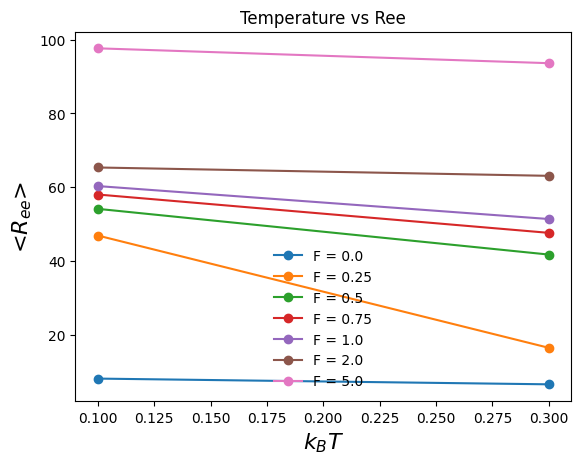

In [14]:
for f in forces:
    data = []
    tempsCopy = temps[:]
    for cgt in lsCGTBl10:
        try:
            i = np.where(cgt.f == f)[0][0]
        except IndexError:
            tempsCopy.remove(cgt.t)
            continue
        data.append(cgt.aveRee[i])
    plt.plot(tempsCopy, data, 'o-', label = 'F = ' + str(f))

plt.xlabel('$k_{B} T$', fontsize=16)
plt.ylabel('<$R_{ee}$>', fontsize=16)
plt.legend(frameon=False)
plt.title("Temperature vs Ree")
plt.savefig('../Data/Block5/Figures/TvsRee')

## Force Extension

Text(0.5, 1.0, 'Force-Ree')

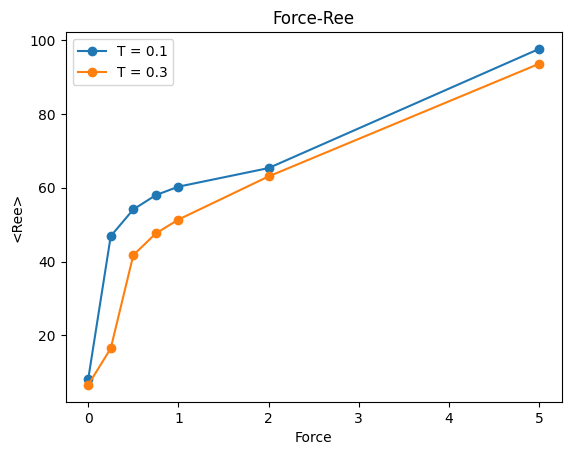

In [15]:
#Ree
for cgt in lsCGTBl10:
    plt.plot(cgt.f, cgt.aveRee, 'o-', color = cgt.color, label = 'T = ' + str(cgt.t))

plt.legend()
plt.xlabel('Force')
plt.ylabel('<Ree>')
plt.title('Force-Ree')
# plt.savefig('../Data/Block10/Figures/FvsRee')

Text(0.5, 1.0, 'fb/kT vs. Ree for blocksize = 10')

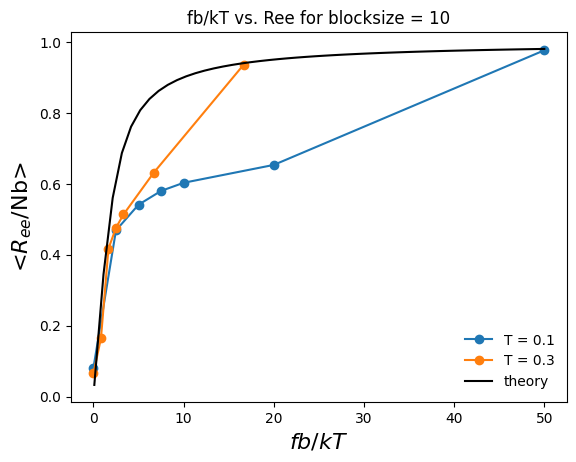

In [27]:
for cgt in lsCGTBl10:
    force = cgt.f
    Ree = cgt.aveRee
    plt.plot(cgt.f/ cgt.t, cgt.aveRee / 100, 'o-', color = cgt.color, label = 'T = ' + str(cgt.t))

x = np.linspace(0.1, 50)
y = 1 / np.tanh(x) - 1 / x
plt.plot(x,y, color = 'k', label = 'theory')

plt.xlabel('$fb/kT$', fontsize=16)
plt.ylabel('<$R_{ee}$/Nb>', fontsize=16)
plt.legend(frameon=False)
plt.title("fb/kT vs. Ree for blocksize = 10")

Text(0.5, 1.0, 'Block10')

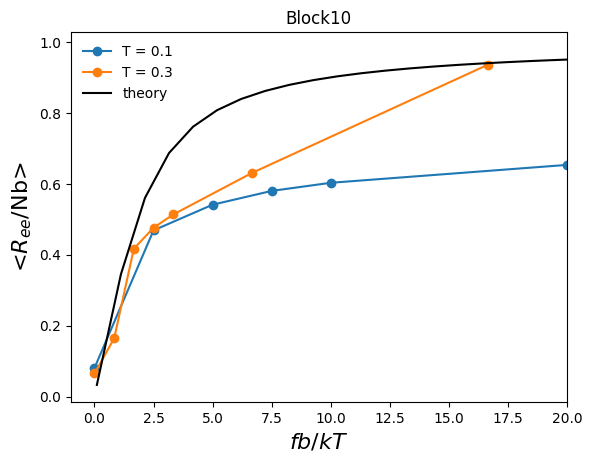

In [26]:
#Below Critical temperature
for cgt in lsCGTBl10[0:3]:
    plt.plot(cgt.f / cgt.t, cgt.aveRee / 100, 'o-', color = cgt.color, label = 'T = ' + str(cgt.t))

plt.plot(x,y, color = 'k', label = 'theory')
plt.xlabel('$fb/kT$', fontsize=16)
plt.ylabel('<$R_{ee}$/Nb>', fontsize=16)
plt.legend(frameon=False)
plt.xlim(-1,20)
plt.title('Block10')

In [18]:
# # After first transition
# dGlobule = np.sqrt(6) / 3 * 2
# fbkt = [0.5/0.1, 1/0.3, 1.1/0.5]
# Ree = [CGT01.aveRee[5], CGT03.aveRee[3], CGT05.aveRee[7]]
# Rseg = (Ree - 10 * dGlobule) / 10
# plt.title('First transition')
# plt.plot(fbkt, Rseg)
# plt.xlabel('$fb/kT$', fontsize=16)
# plt.ylabel('<$R_{seg}$/Nb>', fontsize=16)

[0.95 0.98]
[71.5 73. ]


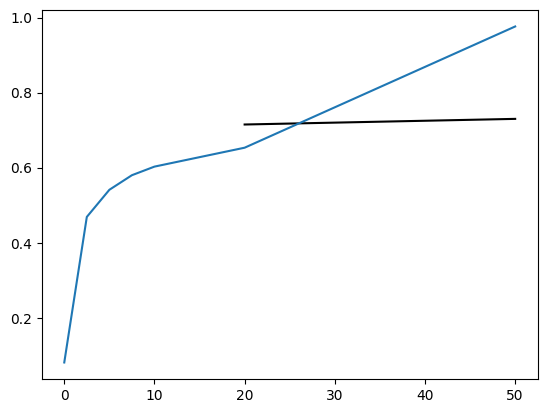

In [19]:
#T = 0.1 Theory
DGlob = 2.4 #Temporary, find out about this later

fbkt = CGT01.f[5:8] / 0.1
lag  = 1 / np.tanh(fbkt) - 1 / (fbkt)
print(lag)
RTheory = (lag * 5 + DGlob) * 10
print(RTheory)

plt.plot(fbkt, RTheory / 100, color = 'k')
plt.plot(CGT01.f / 0.1, CGT01.aveRee / 100)

In [20]:
# T = 0.1
f = [0, 0.5, 1, 2, 5]
t = 0.1
Rgfolder = '../Data/Block5/Unfold/T0.1/Rg'
Reefolder = '../Data/Block5/Unfold/T0.1/Ree'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT01Inv = CGT(f,t,Rgpaths, Reepaths)

In [21]:
# T = 0.5
f = [0, 0.5, 0.6, 0.75, 0.9, 1, 2]
t = 0.5
Rgfolder = '../Data/Block5/Unfold/T0.5/Rg'
Reefolder = '../Data/Block5/Unfold/T0.5/Ree'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT05Inv = CGT(f,t,Rgpaths, Reepaths)

(0.0, 6.0)

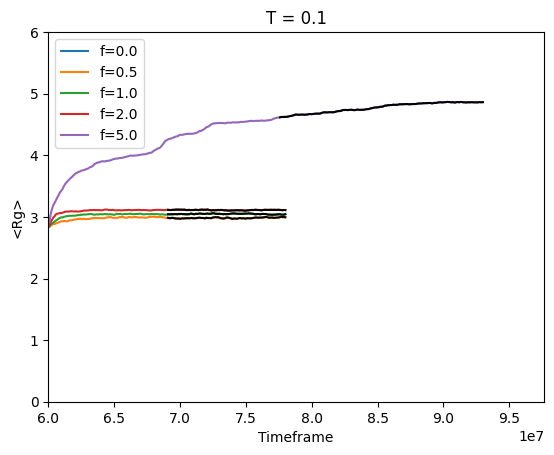

In [22]:
CGT01Inv.Plot('Rg')
plt.xlim(6e7)
plt.ylim(0, 6)

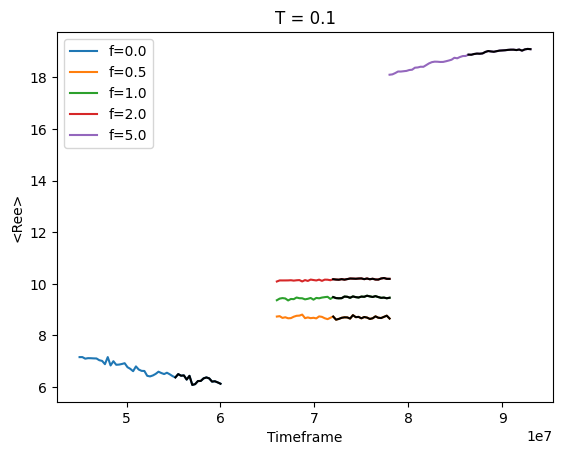

In [23]:
CGT01Inv.Plot('Ree')

(0.0, 10.0)

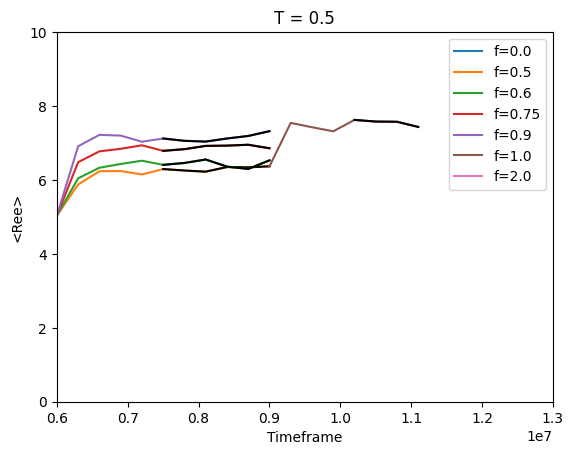

In [24]:
CGT05Inv.Plot('Ree')
plt.xlim(0.6e7, 1.3e7)
plt.ylim(0, 10)